# Otimizar e salvar modelos

No notebook anterior, usamos modelos de regressão complexos para observar a relação entre os recursos de um conjunto de dados de aluguel de bicicletas. Neste portátil, veremos se podemos melhorar ainda mais o desempenho desses modelos.

Vamos começar carregando os dados de compartilhamento de bicicletas como um Pandas DataFrame e visualizando as primeiras linhas. Como de costume, também dividiremos nossos dados em conjuntos de dados de treinamento e teste.

In [2]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!python -m wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


Saved under daily-bike-share (1).csv
   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0        2           1   
4        5  1/5/2011       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  rentals  day  
0           2  0.344167  0.363625  0.805833   0.160446      331    1  
1           2  0.363478  0.353739  0.696087   0.248539      131    2  
2           1  0.196364  0.189405  0.437273   0.248309      120    3  
3           1  0.200000  0.212122  0.590435   0.160296      108    4  
4           1  0.226957  0.229270  0.436957   0.186900       82    5  
Training Set: 511 rows
Test Set: 220 rows


Agora temos os quatro conjuntos de dados a seguir:

<ul>
<li>X_train : Os valores de recursos que usaremos para treinar o modelo
<li>y_train : Os rótulos correspondentes que usaremos para treinar o modelo
<li>X_test : Os valores de recursos que usaremos para validar o modelo
<li>y_test : Os rótulos correspondentes que usaremos para validar o modelo
</ul>

Agora estamos prontos para treinar um modelo ajustando um algoritmo de conjunto de reforço , como em nosso último notebook. Lembre-se de que um estimador de Gradient Boosting é como um algoritmo Random Forest, mas em vez de construir todas as árvores de forma independente e obter o resultado médio, cada árvore é construída nas saídas da anterior na tentativa de reduzir incrementalmente a perda (erro) no modelo.

GradientBoostingRegressor() 

MSE: 104204.17720524623
RMSE: 322.80671802991685
R2: 0.7957142508228576


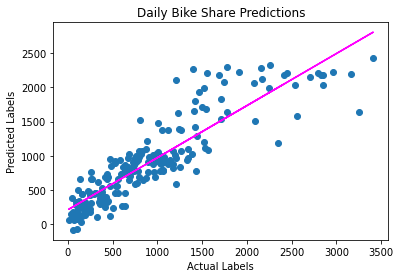

In [3]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Otimizar hiperparâmetros

Dê uma olhada na definição do estimador GradientBoostingRegressor na saída acima e observe que ela, como os outros estimadores que tentamos anteriormente, inclui um grande número de parâmetros que controlam a maneira como o modelo é treinado. No aprendizado de máquina, o termo parâmetros se refere a valores que podem ser determinados a partir de dados; os valores que você especifica para afetar o comportamento de um algoritmo de treinamento são mais corretamente chamados de hiperparâmetros .

Os hiperparâmetros específicos para um estimador variam com base no algoritmo que o estimador encapsula. No caso do estimador GradientBoostingRegressor , o algoritmo é um conjunto que combina várias árvores de decisão para criar um modelo preditivo geral. Você pode aprender sobre os hiperparâmetros desse estimador na <b><a src="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html">documentação do Scikit-Learn</a></b> .

Não entraremos em detalhes de cada hiperparâmetro aqui, mas eles trabalham juntos para afetar a maneira como o algoritmo treina um modelo. Em muitos casos, os valores padrão fornecidos pelo Scikit-Learn funcionarão bem; mas pode haver alguma vantagem em modificar os hiperparâmetros para obter um melhor desempenho preditivo ou reduzir o tempo de treinamento.

Então, como você sabe quais valores de hiperparâmetros você deve usar? Bem, na ausência de uma compreensão profunda de como o algoritmo subjacente funciona, você precisará experimentar. Felizmente, o SciKit-Learn fornece uma maneira de ajustar hiperparâmetros tentando várias combinações e encontrando o melhor resultado para uma determinada métrica de desempenho.

Vamos tentar usar uma abordagem de pesquisa de grade para tentar combinações de uma grade de valores possíveis para os hiperparâmetros learning_rate e n_estimators do estimador GradientBoostingRegressor .

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 100} 

GradientBoostingRegressor() 

MSE: 103735.88353021991
RMSE: 322.0805544118116
R2: 0.7966323111809298


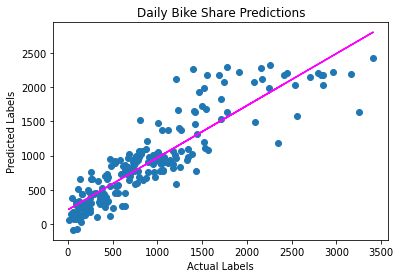

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

<b><i>Observação : o uso de valores aleatórios no algoritmo de aumento de gradiente resulta em métricas ligeiramente diferentes a cada vez. Nesse caso, é improvável que o melhor modelo produzido pelo ajuste de hiperparâmetro seja significativamente melhor do que um treinado com os valores de hiperparâmetro padrão; mas ainda é útil conhecer a técnica de ajuste de hiperparâmetros!</i></b>

## Pré-processar os dados

Treinamos um modelo com dados carregados diretamente de um arquivo de origem, com resultados apenas moderadamente bem-sucedidos.

Na prática, é comum realizar algum pré-processamento dos dados para tornar mais fácil para o algoritmo ajustar um modelo a ele. Há uma grande variedade de transformações de pré-processamento que você pode realizar para preparar seus dados para modelagem, mas vamos nos limitar a algumas técnicas comuns:

### Dimensionamento de recursos numéricos

A normalização de recursos numéricos para que fiquem na mesma escala evita que recursos com valores grandes produzam coeficientes que afetem desproporcionalmente as previsões. Por exemplo, suponha que seus dados incluam os seguintes recursos numéricos:

| A |  B  |  C  |
| - | --- | --- |
| 3 | 480 | 65  |

A normalização desses recursos para a mesma escala pode resultar nos seguintes valores (assumindo que A contém valores de 0 a 10, B contém valores de 0 a 1000 e C contém valores de 0 a 100):

|  A  |  B  |  C  |
| --  | --- | --- |
| 0.3 | 0.48| 0.65|

Existem várias maneiras de dimensionar dados numéricos, como calcular os valores mínimo e máximo para cada coluna e atribuir um valor proporcional entre 0 e 1 ou usar a média e o desvio padrão de uma variável normalmente distribuída para manter a mesma dispersão de valores em outra escala.

### Codificando variáveis categóricas

Os modelos de aprendizado de máquina funcionam melhor com recursos numéricos em vez de valores de texto, portanto, geralmente é necessário converter recursos categóricos em representações numéricas. Por exemplo, suponha que seus dados incluam o seguinte recurso categórico.

| Size |
| ---- |
|  S   |
|  M   |
|  L   |

Você pode aplicar a codificação ordinal para substituir um valor inteiro exclusivo para cada categoria, assim:

| Size |
| ---- |
|  0   |
|  1   |
|  2   |

Outra técnica comum é usar uma codificação a quente para criar recursos binários individuais (0 ou 1) para cada valor de categoria possível. Por exemplo, você pode usar a codificação one-hot para traduzir as categorias possíveis em colunas binárias como esta:

|  Size_S  |  Size_M  |  Size_L  |
| -------  | -------- | -------- |
|    1     |     0    |    0     |
|    0     |     1    |    0     |
|    0     |     0    |    1     |

Para aplicar essas transformações de pré-processamento ao aluguel de bicicletas, usaremos um recurso do Scikit-Learn chamado pipelines . Isso nos permite definir um conjunto de etapas de pré-processamento que terminam com um algoritmo. Você pode então ajustar todo o pipeline aos dados, para que o modelo encapsule todas as etapas de pré-processamento, bem como o algoritmo de regressão. Isso é útil, porque quando queremos usar o modelo para prever valores de novos dados, precisamos aplicar as mesmas transformações (com base nas mesmas distribuições estatísticas e codificações de categoria usadas com os dados de treinamento).

<b><i>Observação : o termo pipeline é usado extensivamente em aprendizado de máquina, geralmente para significar coisas muito diferentes! Nesse contexto, estamos usando-o para fazer referência a objetos de pipeline no Scikit-Learn, mas você pode vê-lo usado em outro lugar para significar outra coisa.</i></b>

In [5]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


OK, o modelo está treinado, incluindo as etapas de pré-processamento. Vamos ver como ele se comporta com os dados de validação.

MSE: 105731.58776684396
RMSE: 325.1639398316547
R2: 0.792719858282696


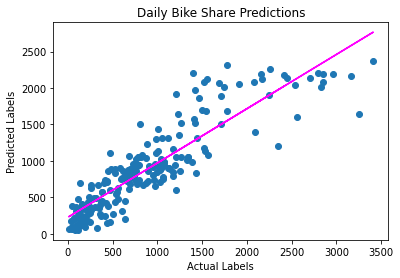

In [6]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

O pipeline é composto pelas transformações e pelo algoritmo usado para treinar o modelo. Para tentar um algoritmo alternativo, basta alterar essa etapa para um tipo diferente de estimador.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 102661.9085909091
RMSE: 320.40897083400944
R2: 0.7987377716428694


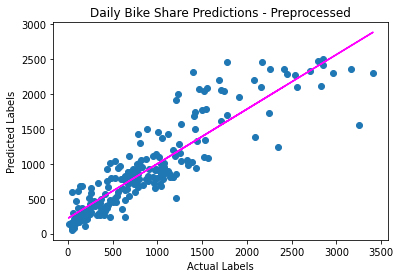

In [7]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Já vimos várias técnicas comuns usadas para treinar modelos preditivos para regressão. Em um projeto real, você provavelmente tentaria mais alguns algoritmos, hiperparâmetros e transformações de pré-processamento; mas agora você já deve ter entendido a ideia geral. Vamos explorar como você pode usar o modelo treinado com novos dados.

### Use o modelo treinado

Primeiro, vamos salvar o modelo.

In [8]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Agora, podemos carregá-lo sempre que precisarmos e usá-lo para prever rótulos para novos dados. Isso geralmente é chamado de pontuação ou inferência .

In [9]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 104 rentals


O método de previsão do modelo aceita uma matriz de observações, para que você possa usá-lo para gerar várias previsões como um lote. Por exemplo, suponha que você tenha uma previsão do tempo para os próximos cinco dias; você pode usar o modelo para prever o aluguel de bicicletas para cada dia com base nas condições climáticas esperadas.



In [10]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

5-day rental predictions:
576.0
699.0
242.0
204.0
263.0


# Resumo

Isso conclui os notebooks para este módulo sobre regressão. Neste notebook, executamos uma regressão complexa, ajustamos, salvamos o modelo e o usamos para prever resultados para o futuro.

# Leitura adicional

Para saber mais sobre o Scikit-Learn, consulte a documentação do <b><a src="https://scikit-learn.org/stable/user_guide.html">Scikit-Learn</a></b> .